# OpenI

In [ ]:
labels = ['Airspace Disease', 'Atelectasis', 'Calcified granuloma', 'Calcinosis', 'Cardiomegaly', 'Cicatrix', 'Deformity', 'Effusion', 'Emphysema', 'Medical Device', 'Nodule', 'indwelling catheters', 'granulomatous disease', 'lung hyperdistention', 'lung hypoinflation', 'nodule', 'opacity', 'spine degenerative', 'surgical instrument', 'thoracic vertebrae degenerative']

In [ ]:
airspace opacification is caused by filling of the alveoli with material that attenuates X-rays more than the surrounding parenchyma.
fluid accumulates (as in pulmonary oedema) or there are inflammatory cells (as with infection) in the airspaces.

# Ohsumed 

```
Bacterial Infections and Mycoses                      C01
Virus Diseases                                        C02
Parasitic Diseases                                    C03
Neoplasms                                             C04
Musculoskeletal Diseases                              C05
Digestive System Diseases                             C06
Stomatognathic Diseases                               C07
Respiratory Tract Diseases                            C08
Otorhinolaryngologic Diseases                         C09
Nervous System Diseases                               C10
Eye Diseases                                          C11
Urologic and Male Genital Diseases                    C12
Female Genital Diseases and Pregnancy Complications   C13
Cardiovascular Diseases                               C14
Hemic and Lymphatic Diseases                          C15
Neonatal Diseases and Abnormalities                   C16
Skin and Connective Tissue Diseases                   C17
Nutritional and Metabolic Diseases                    C18
Endocrine Diseases                                    C19
Immunologic Diseases                                  C20
Disorders of Environmental Origin                     C21
Animal Diseases                                       C22
Pathological Conditions, Signs and Symptoms           C23
```

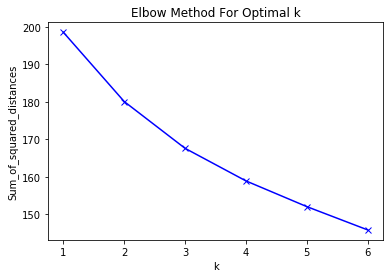

In [1]:
from transformers import BertTokenizer, BertModel
import torch
from scipy import spatial
import numpy as np
from sklearn_extra.cluster import KMedoids
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt


labels = ['C01','C02', 'C03', 'C04', 'C05', 'C06', 'C07', 'C08', 'C09', 'C10', 'C11', 'C12', 'C13', 'C14', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23' ]
labels_title = ['Bacterial Infections and Mycoses','Virus Diseases', 'Parasitic Diseases', 'Neoplasms', 'Musculoskeletal Diseases', 'Digestive System Diseases', 'Stomatognathic Diseases', 'Respiratory Tract Diseases', 'Otorhinolaryngologic Diseases', 'Nervous System Diseases', 'Eye Diseases', 'Urologic and Male Genital Diseases','Female Genital Diseases and Pregnancy Complications','Cardiovascular Diseases', 'Hemic and Lymphatic Diseases', 'Neonatal Diseases and Abnormalities', 'Skin and Connective Tissue Diseases', 'Nutritional and Metabolic Diseases', 'Endocrine Diseases', 'Immunologic Diseases', 'Disorders of Environmental Origin', 'Animal Diseases', 'Pathological Conditions, Signs and Symptoms']

labels_dict={
    'Bacterial Infections and Mycoses': "Bacterial Infections and Mycoses. A bacterial infection is a proliferation of a harmful strain of bacteria on or inside the body. Mycoses are common and a variety of environmental and physiological conditions can contribute to the development of fungal diseases. Inhalation of fungal spores or localized colonization of the skin may initiate persistent infections; therefore, mycoses often start in the lungs or on the skin.",

    'Virus Diseases': "Virus Diseases. Viruses cause familiar infectious diseases such as the common cold, flu and warts. ", 

    'Parasitic Diseases': "A parasitic disease, also known as parasitosis, is an infectious disease caused or transmitted by a parasite. Many parasites do not cause diseases as it may eventually lead to death of both organism and host. Parasites infecting human beings are called human parasites.", 
    
    'Neoplasms': "A neoplasm is an abnormal growth of cells, also known as a tumor. Neoplastic diseases are conditions that cause tumor growth — both benign and malignant. Benign tumors are noncancerous growths.",

    'Musculoskeletal Diseases': "Musculoskeletal disorders (MSD) are injuries or disorders that affect the human body’s movement or musculoskeletal system. such as muscles, nerves, tendons, joints, cartilage, and spinal discs. ",

    'Digestive System Diseases': "Digestive System Diseases. A digestive disease is any health problem that occurs in the digestive tract. Conditions may range from mild to serious. Some common problems include heartburn, cancer, irritable bowel syndrome, and lactose intolerance. Other digestive diseases include: Gallstones, cholecystitis, and cholangitis.", 

    'Stomatognathic Diseases': "General or unspecified diseases of the stomatognathic system, comprising the mouth, teeth, jaws, and pharynx. Synonym(s): Dental Diseases, Mouth and Tooth Diseases, Dental Disease, Disease, Dental, Narrow term(s): Jaw Diseases.", 

    'Respiratory Tract Diseases': "Respiratory Tract Diseases. A type of disease that affects the lungs and other parts of the respiratory system. Respiratory diseases may be caused by infection, by smoking tobacco, or by breathing in secondhand tobacco smoke, radon, asbestos, or other forms of air pollution.", 

    'Otorhinolaryngologic Diseases': "Otorhinolaryngologic Diseases is a branch of medicine that deals with diagnosis and treatment of diseases of the ear, nose, and throat.", 

    'Nervous System Diseases': "Nervous system diseases, any of the diseases or disorders that affect the functioning of the human nervous system. Everything that humans sense, consider, and effect and all the unlearned reflexes of the body depend on the functioning of the nervous system.", 

    'Eye Diseases': "Eye Diseases are any disease of the eye or cornea. macular degeneration. eye disease caused by degeneration of the cells of the macula lutea and results in blurred vision; can cause blindness. retinopathy. a disease of the retina that can result in loss of vision.", 

    'Urologic and Male Genital Diseases': "Urologic and Male Genital Diseases. A male genital disease is a condition that affects the male reproductive system. An example is orchitis.",

    'Female Genital Diseases and Pregnancy Complications': "Female Genital Diseases and Pregnancy Complications, Vaginal Diseases, Complications of pregnancy are health problems that occur during pregnancy. They can involve the mother's health, the baby's health, or both. Some women have health problems that arise during pregnancy, and other women have health problems before they become pregnant that could lead to complications.",

    'Cardiovascular Diseases': "Cardiovascular disease (CVD) is the name for the group of disorders of heart and blood vessels, and include: hypertension (high blood pressure) coronary heart disease (heart attack) cerebrovascular disease (stroke)", 

    'Hemic and Lymphatic Diseases': "Hemic and Lymphatic Diseases. Hemic diseases include disorders involving the formed elements (e.g., Erythrocyte Aggregation, Intravascular) and chemical components (e.g., BLOOD PROTEIN DISORDERS); lymphatic diseases include disorders relating to lymph, lymph nodes, and lymphocytes.", 

    'Neonatal Diseases and Abnormalities': "Neonatal Diseases and Abnormalities. Diseases existing at birth and often before birth, or that develop during the first month of life (Infant, Newborn, Diseases), regardless of causation." , 

    'Skin and Connective Tissue Diseases': "A connective tissue disease is any disease that affects the parts of the body that connect the structures of the body together. Connective tissues are made up of two proteins: collagen and elastin.", 

    'Nutritional and Metabolic Diseases': "Nutritional and Metabolic Diseases. A metabolic disorder occurs when the metabolism process fails and causes the body to have either too much or too little of the essential substances needed to stay healthy. Our bodies are very sensitive to errors in metabolism. The body must have amino acids and many types of proteins to perform all of its functions.", 

    'Endocrine Diseases': "Endocrine Diseases. Endocrine disorders are diseases related to the endocrine glands of the body. The endocrine system produces hormones, which are chemical signals sent out, or secreted, through the bloodstream.", 

    'Immunologic Diseases': "Immunologic Diseases. Immunological disorders are diseases or conditions caused by a dysfunction of the immune system and include allergy, asthma, autoimmune diseases, autoinflammatory syndromes and immunological deficiency syndromes.", 

    'Disorders of Environmental Origin': "Disorders of Environmental Origin. Disorders caused by external forces rather than by physiologic dysfunction or by pathogens.  ", 

    'Animal Diseases': "Animal diseases, an impairment of the normal state of an animal that interrupts or modifies its vital functions.", 

    'Pathological Conditions, Signs and Symptoms' : "Pathological Conditions, Signs and Symptoms. Abnormal anatomical or physiological conditions and objective or subjective manifestations of disease, not classified as disease or syndrome."
}

def cos_sim(vec1, vec2):
    return 1 - spatial.distance.cosine(vec1, vec2)

def get_embd(word, tokenizer, model):
    inputs = tokenizer(word, return_tensors="pt")
    outputs = model(**inputs)
    hidden_units = outputs.last_hidden_state[0]
    # print(torch.mean(hidden_units,axis=0).shape)
    return torch.mean(hidden_units,axis=0)

def get_all_label_embds(labels_title, tokenizer, model):
    embds = []
    for label in labels_title:
        embds.append(get_embd(label, tokenizer, model).detach().numpy())
    embds = np.array(embds)
    embds.shape
    # cos_sim(get_embd("hi"), get_embd("hello"))

    mms = MinMaxScaler()
    mms.fit(embds)
    data_transformed = mms.transform(embds)

    return data_transformed

def plot_elbow_method(data, Krange):
    Sum_of_squared_distances = []
    K = range(1,Krange)
    for k in K:
        km = KMedoids(n_clusters=k)
        km = km.fit(data)
        Sum_of_squared_distances.append(km.inertia_) # inertia is calculated as the sum of squared distance for each point to it's closest centroid

    plt.xlabel('k')
    plt.ylabel('Sum_of_squared_distances')
    plt.title('Elbow Method For Optimal k')
    plt.plot(K, Sum_of_squared_distances, 'bx-')
    plt.savefig(f'elbow.png', dpi=100)



tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased', return_dict=True)
embds = get_all_label_embds(labels_title, tokenizer, model)
plot_elbow_method(embds,7)

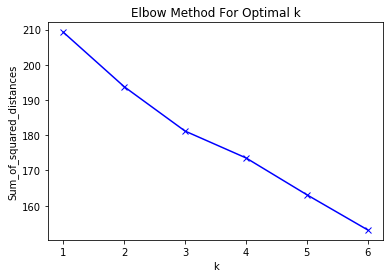

In [10]:
embds = get_all_label_embds(list(labels_dict.values()), tokenizer, model)
plot_elbow_method(embds,7)

In [2]:
def grouping_kmediod(data, n_clusters_):
    n_clusters_ = 4
    kmedoids = KMedoids(n_clusters=n_clusters_, random_state=0).fit(data)
    heads_index = [list(np.where(kmedoids.labels_==i)[0]) for i in range(n_clusters_)]

    groupings = []
    for head_index in heads_index:
        tmp = []
        for i in head_index:
            tmp.append(labels_title[i])
        groupings.append(tmp)
    for group in groupings:
        print(group)
    return heads_index

In [6]:
grouping_kmediod(embds, 4)

['Eye Diseases', 'Cardiovascular Diseases', 'Nutritional and Metabolic Diseases']
['Bacterial Infections and Mycoses', 'Musculoskeletal Diseases', 'Stomatognathic Diseases', 'Otorhinolaryngologic Diseases', 'Urologic and Male Genital Diseases', 'Female Genital Diseases and Pregnancy Complications', 'Hemic and Lymphatic Diseases', 'Neonatal Diseases and Abnormalities', 'Skin and Connective Tissue Diseases', 'Endocrine Diseases', 'Immunologic Diseases', 'Disorders of Environmental Origin', 'Pathological Conditions, Signs and Symptoms']
['Digestive System Diseases', 'Respiratory Tract Diseases', 'Nervous System Diseases']
['Virus Diseases', 'Parasitic Diseases', 'Neoplasms', 'Animal Diseases']


[[10, 13, 17],
 [0, 4, 6, 8, 11, 12, 14, 15, 16, 18, 19, 20, 22],
 [5, 7, 9],
 [1, 2, 3, 21]]

In [8]:
grouping_kmediod(embds, 4)

['Bacterial Infections and Mycoses', 'Virus Diseases', 'Parasitic Diseases', 'Neoplasms', 'Skin and Connective Tissue Diseases', 'Nutritional and Metabolic Diseases', 'Disorders of Environmental Origin', 'Animal Diseases']
['Musculoskeletal Diseases', 'Digestive System Diseases', 'Stomatognathic Diseases', 'Otorhinolaryngologic Diseases', 'Eye Diseases', 'Cardiovascular Diseases', 'Hemic and Lymphatic Diseases', 'Endocrine Diseases', 'Immunologic Diseases']
['Nervous System Diseases', 'Urologic and Male Genital Diseases', 'Female Genital Diseases and Pregnancy Complications', 'Neonatal Diseases and Abnormalities', 'Pathological Conditions, Signs and Symptoms']
['Respiratory Tract Diseases']


[[0, 1, 2, 3, 16, 17, 20, 21],
 [4, 5, 6, 8, 10, 13, 14, 18, 19],
 [9, 11, 12, 15, 22],
 [7]]